### Code for: "Eusociality through conflict dissolution" by Mauricio González-Forero and Jorge Peña

Running the cells of this notebooks in order produces unannotated versions of Fig. 2, 3, 4, S11, S12, S13, and S14.

In [1]:
include("./ConflictDissolution.jl")
using .ConflictDissolution
using DifferentialEquations
using Roots
using Plots, ColorSchemes, Colors
using PyPlot

Set up the model. mp stores the parameters of the model; mf stores the different functions needed to run the model (created by ConflictDissolution.setupfunctions() from the description given in mp).

In [2]:
ploidy = "D" # ploidy/genetic system
gender_helpers = "B" # helpers' sex
σ1 = 1/2 # proportion of females 1st brood
σ2 = 1/2 # proportion of females 2nd brood
f1 = 8 # early fertility (number of offspring 1st brood)
s1 = .1 # 1st brood survival
s2 = .1 # 2nd brood survival
f0 = 1 # parameter for f2(z) function
α = 1 # parameter for f2(z) function
sMmin = .2 # maximum sM with 0 helpers
sMmax = 1 # maximum sM
f2min = 36 # minimum maximum late fertility (this is twice the initial f2)
f2max = 72 # maximum late fertility
ξ = 1 # mother's power parameter
ψ = 1 # offspring's power parameter
contest_type = "sequential" # type of contest
Gx = 1 # genetic variance x
Gy = 1 # genetic variance y
Gz = 1 # genetic variance z

mp = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gz)
mf = ConflictDissolution.setupfunctions(mp)

Model Functions

Functions to interface with PyPlot.

In [3]:
colorname(c) = string("#",hex(c))

function meshgrid(x, y)
    X = [i for i in x, j in 1:length(y)]
    Y = [j for i in 1:length(x), j in y]
    return X, Y
end

meshgrid (generic function with 1 method)

Color palette.

In [4]:
ColorSchemes.seaborn_colorblind

Color parameters.

In [5]:
alpha_lines = 1.0
alpha_bg = 0.2

colorx = colorname(ColorSchemes.seaborn_bright[1]) # "blue"
colory = colorname(ColorSchemes.seaborn_bright[1]) # "blue"
colorz = colorname(ColorSchemes.seaborn_bright[4]) # "red"
colorp = colorname(ColorSchemes.seaborn_bright[1]) # "blue" #"orange"
colorBC = colorname(ColorSchemes.seaborn_bright[4]) # "red" #"purple"
colorBCs = colorname(ColorSchemes.seaborn_bright[4]) # "red" #"purple"
colorsM = colorname(ColorSchemes.seaborn_bright[1]) # "blue" #"magenta"
colorf2 = colorname(ColorSchemes.seaborn_bright[4]) #"red" #"cyan"


color_f2star_contour = colorname(ColorSchemes.seaborn_bright[3])
color_conflict = colorname(ColorSchemes.seaborn_bright[7]) #"magenta"
color_voluntary = colorname(ColorSchemes.seaborn_bright[9]) #"yellow"
color_nohelping = colorname(ColorSchemes.seaborn_bright[10]) #"cyan"

colorscheme_tradeoff_alleviation = ColorSchemes.Blues_9
color_f2star = colorname(ColorSchemes.seaborn_bright[4]) #"red"

ticksfontsize = 20
linewidth = 5

linewidth_contour = 3

3

Function to plot trade-off figures (either in linear or log scale).

In [6]:
function plot_tradeoff_alleviation(colorscheme,scale,hs)

    figsize = (3.5,3.5)
    labelsize_small = 5*2
    fontsize_small = 5*2

    fig = PyPlot.figure(figsize=figsize)

    h̄ = ConflictDissolution.hbar(mp)

    steps = 100

    # line with f2=f2*
    #hhs = range(0.,stop=h̄,length=steps)
    #f2stars = mf.f2star.(hhs)

#    PyPlot.plot(f2stars,mf.sM.(f2stars,hhs),color=color_f2star,lw=linewidth,zorder=10,alpha=.5)
    
    # circles with f2=f2*
    PyPlot.plot(mf.f2star.(hs),mf.sM.(mf.f2star.(hs),hs),color=color_f2star,linestyle="",marker="o",markersize=10,zorder=10)

    f2s = range(0.,stop=mp.f2max,length=steps)
    sMs = range(0.,stop=1.,length=steps)

    F2s = repeat(f2s',steps)
    SMs = repeat(sMs,1,steps)

    Π2Π2s = F2s.*SMs*mp.s2

    #hs = (0,2,4,6,8)
    Π2s = zeros(length(hs))

    for i=1:length(hs)
        h = hs[i]
        c = get(colorscheme,i/length(hs))
        PyPlot.plot(f2s,mf.sM.(f2s,h),lw=linewidth,color=colorname(c),label=h)
        Π2s[i] = mf.Π2(mf.f2star(h),h)
    end

    cont = PyPlot.contour(F2s,SMs,Π2Π2s,levels=Π2s,colors="black",alpha=0.5,linewidths=linewidth)

    PyPlot.tick_params(axis="x", labelsize=20)
    PyPlot.tick_params(axis="y", labelsize=20)

    PyPlot.xlim([1,mp.f2max])
    PyPlot.ylim([0.01,1.])

    PyPlot.xscale(scale)
    PyPlot.yscale(scale)
    
end

plot_tradeoff_alleviation (generic function with 1 method)

Fig. 3A

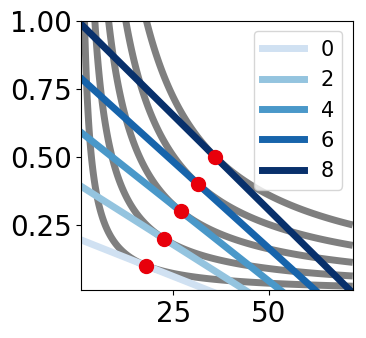

In [7]:
plot_tradeoff_alleviation(colorscheme_tradeoff_alleviation,"linear",(0,2,4,6,8))

PyPlot.legend(fontsize=15)

PyPlot.savefig("Fig3A.pdf",bbox_inches="tight")

Fig. 3B

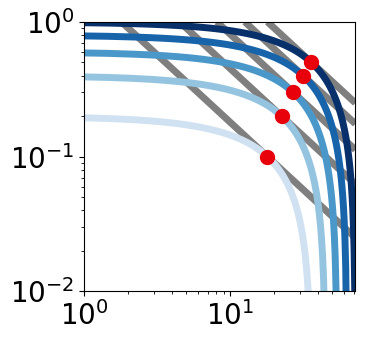

In [8]:
plot_tradeoff_alleviation(colorscheme_tradeoff_alleviation,"log",(0,2,4,6,8))

#PyPlot.rc("text", usetex=true)
#PyPlot.rc("font", family="serif")

#PyPlot.vlines(x=mf.f2star(0),ymin=mf.sM(mf.f2star(0),0),ymax=mf.sM(mf.f2star(0),2),linestyle=":")

PyPlot.savefig("Fig3B.pdf",bbox_inches="tight")

Function to plot the contour of the joint phenotype function.

In [9]:
function jointphenotypecontour()

    fontsize_small = 7*2

    fig = PyPlot.figure(figsize=(3.5,3.5))

    x = range(0.,stop=3.,length=100)
    y = range(0.,stop=3.,length=100)
    
    X, Y = meshgrid(x, y)
    
    P = mf.p.(X,Y)
    
    cont = PyPlot.contourf(X,Y,P,100)
    #cont = PyPlot.contour(X,Y,P)
    
    cb = fig.colorbar(cont)
    
end 

jointphenotypecontour (generic function with 1 method)

Fig. S11A (joint phenotype function, sequential contest).

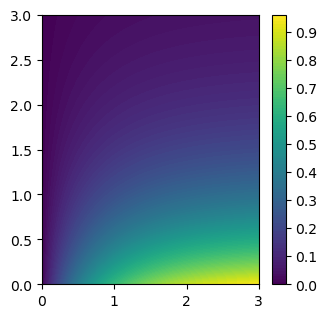

In [10]:
jointphenotypecontour()
PyPlot.savefig("FigS11A.pdf",bbox_inches="tight")

Run the model with constant $z$ and plot the resulting $x(\tau)$ and $y(\tau)$ for a quick assessment of the process.

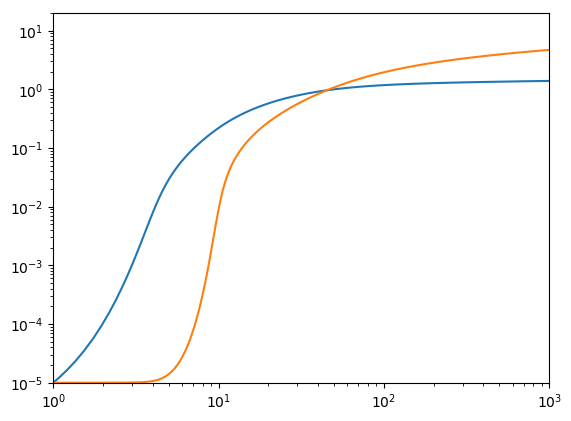

(1.0e-5, 20)

In [11]:
zvec0 = [0.00001;0.00001]
#tspan = (0.0, 1000.0)
tspan = (1.0, 1000.0)
prob = ODEProblem(mf.evoldyn_z0,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(t,x,y,z,p,f2,h,sM,sM_without_helpers,Π2,BC,BCO,BCM) = ConflictDissolution.get_alloutputs(sol,mp,mf,"z0")

PyPlot.plt.loglog(t,x)
PyPlot.plt.loglog(t,y)

PyPlot.plt.xlim(1, 1e3)
PyPlot.plt.ylim(1e-5, 20)

Is there conflict at the starting point?

In [12]:
is_there_conflict_at_start = (mf.SpO(0,z[1]) < 0) & (mf.SpM(0,z[1]) > 0)

true

Function to produce the main contour plot (i.e., the one used in Fig. 2A and 2F).

In [13]:
function maincontourplot(plot_contour_Sz)
    
    fontsize_small = 7*2

    fig = PyPlot.figure(figsize=(3.5,3.5))

    pps = range(0.,stop=1.,length=100)
    zzs = range(0.001,stop=mp.f2max/2,length=100)
    
    P, Z = meshgrid(pps, zzs)
    SO = mf.SpO.(P,Z)
    SM = mf.SpM.(P,Z)
    Sz = mf.Sz.(P,Z)
    
    if plot_contour_Sz == true
        # plot contour line from Sz
        PyPlot.contour(P,Z,Sz,levels=[0],
            colors=color_f2star_contour,
            alpha=1.,linestyles="dashed",
            linewidths=linewidth_contour,zorder=10)
    end

    # plot contour lines from selection gradients
    PyPlot.contour(P,Z,SM,levels=[0],colors="gray",alpha=1.,linewidths=linewidth_contour)
    PyPlot.contour(P,Z,SO,levels=[0],colors="gray",alpha=1.,linewidths=linewidth_contour)
    
    PyPlot.contourf(P,Z,SM,levels=[-Inf,0],colors=color_nohelping,alpha=alpha_bg)
    PyPlot.contourf(P,Z,SO,levels=[0,Inf],colors=color_voluntary,alpha=alpha_bg)
    PyPlot.contourf(P,Z,(SO .< 0) .& (SM .> 0),levels=[1/2,3/2],colors=color_conflict,alpha=alpha_bg)
    
    PyPlot.tick_params(axis="x", labelsize=ticksfontsize)
    PyPlot.tick_params(axis="y", labelsize=ticksfontsize)
                
end

maincontourplot (generic function with 1 method)

Fig. 2A.

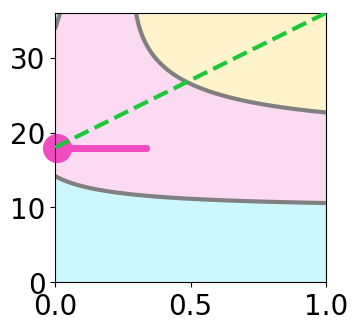

In [14]:
maincontourplot(true)

# end point
PyPlot.plot(last(p),last(z),color=color_conflict,marker="o",markersize=20,clip_on=false)

# add numerical solver path
PyPlot.plot(p,z,color=color_conflict,lw=linewidth)

PyPlot.savefig("Fig2A.pdf",bbox_inches="tight")

Function to produce the main stream plots (i.e., the ones in Fig. 2B and 2G).

In [15]:
function streamplot_dynamics(evoldyn_type,xmax,ymax,steps)

    figsize = (3.5,3.5)
    fig = PyPlot.figure(figsize=figsize)

    X = repeat(range(0,stop=xmax,length=steps)',steps)
    Y = repeat(range(0,stop=ymax,length=steps),1,steps)
    P = mf.p.(X,Y)
    
    if evoldyn_type == "z0"
        z0 = mf.zstar(0) 
        Z = z0
    elseif evoldyn_type == "zfast"
        h̄ = ConflictDissolution.hbar(mp)
        Z = mf.zstar.(h̄*P)
    end

    U = mf.dxdt.(X,Y,Z)
    V = mf.dydt.(X,Y,Z)
    
    SO = mf.SpO.(P,Z)
    SM = mf.SpM.(P,Z)

    conflict = (SO .< 0) .& (SM .> 0)
    no_helping = (SO .< 0) .& (SM .< 0)
    voluntary_helping = (SO .> 0) .& (SM .> 0)

    streamplot(X,Y,U,V,color="gray",density=.3,arrowsize=3)
    
    PyPlot.plot(x,y,color="black",lw=linewidth)
    PyPlot.xlim((0, xmax))
    PyPlot.ylim((0, ymax))

    PyPlot.contourf(X,Y,conflict,levels=[1/2,3/2],colors=color_conflict,alpha=alpha_bg)
    PyPlot.contourf(X,Y,no_helping,levels=[1/2,3/2],colors=color_nohelping,alpha=alpha_bg)
    PyPlot.contourf(X,Y,voluntary_helping,levels=[1/2,3/2],colors=color_voluntary,alpha=alpha_bg)

    PyPlot.contour(X,Y,SO,levels=[0],colors="gray",alpha=1.,linestyles="--")
    PyPlot.contour(X,Y,SM,levels=[0],colors="gray",alpha=1.,linestyles="--")

    PyPlot.tick_params(axis="both", which="major", pad=1, labelsize=ticksfontsize)

    PyPlot.xlim([0.,xmax])
    PyPlot.ylim([0.,ymax])
    
end

streamplot_dynamics (generic function with 1 method)

Fig. 2B.

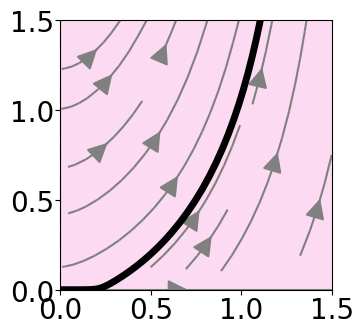

In [16]:
streamplot_dynamics("z0",1.5,1.5,100)
PyPlot.savefig("Fig2B.pdf",bbox_inches="tight")

Get zone flags (used to add color to backgrounds of time series figures).

In [17]:
(nohelping_zone,conflict_zone,voluntary_zone) = ConflictDissolution.get_conflict_flags(p,z,mf)

(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Function for producing the plot of the time series of the evolving traits ($x$, $y$, $z$).

In [18]:
function timeseries_traits(tmin,tmax,ymin,ymax,zmin,zmax)

    fig, ax1 = PyPlot.subplots()
    fig.set_figheight(3.5)
    fig.set_figwidth(3.5)
    
    ax1.plot(t,
        x,
        label="x",
        color=colorx,
        linestyle="solid",
        lw=linewidth,
        alpha=alpha_lines)
    
    ax1.plot(t,
        y,
        label="y",
        color=colory,
        linestyle="dashed",
        lw=linewidth,
        alpha=alpha_lines)
    
    ax1.tick_params(axis="y",
                color=colorx,
                labelcolor=colorx)
    
    ax2 = ax1.twinx()
    
    ax2.plot(t,
        z,
        label="z",
        linestyle="solid",
        lw=linewidth,
        color=colorz,
        alpha=alpha_lines)
    
    ax1.set_yscale("log")
    ax1.set_xscale("log")

    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([ymin,ymax])
    
    # add background colors
    ax1.fill_between(t, ymin, ymax, where = conflict_zone, facecolor=color_conflict,alpha=alpha_bg)
    ax1.fill_between(t, ymin, ymax, where = nohelping_zone, facecolor=color_nohelping,alpha=alpha_bg)
    ax1.fill_between(t, ymin, ymax, where = voluntary_zone, facecolor=color_voluntary,alpha=alpha_bg)
    
    ax2.set_ylim([zmin,zmax])

    ax2.tick_params(axis="y",
                color=colorz,
                labelcolor=colorz)

    ax1.tick_params(axis="x", labelsize=ticksfontsize)
    ax1.tick_params(axis="y", labelsize=ticksfontsize)

    ax2.tick_params(axis="x", labelsize=ticksfontsize)
    ax2.tick_params(axis="y", labelsize=ticksfontsize)
    
end

timeseries_traits (generic function with 1 method)

Fig. 2C.

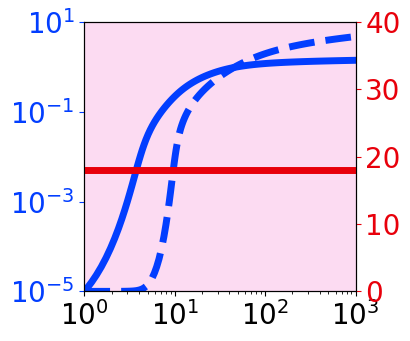

In [19]:
timeseries_traits(1,1000,0.00001,10,0.00001,40)
plt.savefig("Fig2C.pdf",bbox_inches="tight")

Function for producing the plot of the time series of the helping probability ($p$) and the benefit-cost ratio ($B/C$).

In [20]:
function timeseries_pBC(tmin,tmax,pmin,pmax,BCmin,BCmax)
    
    fig, ax1 = plt.subplots()

    fig.set_figheight(3.5)
    fig.set_figwidth(3.5)
    
    ax1.plot(t,
    p,
    label="p",
    color=colorp,
    linestyle="solid",
    lw=linewidth,
    alpha=alpha_lines)
    
    #ax1.set_xscale("log")
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([pmin,pmax])
    
    ax1.fill_between(t, pmin, pmax, where = conflict_zone, facecolor=color_conflict,alpha=alpha_bg)
    ax1.fill_between(t, pmin, pmax, where = nohelping_zone, facecolor=color_nohelping,alpha=alpha_bg)
    ax1.fill_between(t, pmin, pmax, where = voluntary_zone, facecolor=color_voluntary,alpha=alpha_bg)
    
    ax1.tick_params(axis="y",
                color=colorp,
                labelcolor=colorp)

    ax2 = ax1.twinx() 
    ax2.plot(t,
    BC,
    label="B/C",
    color=colorBC,
    linestyle="solid",
    lw=linewidth,
    alpha=alpha_lines)
    
    ax2.plot(t,BCO,color=colorBCs,lw=linewidth,linestyle="dotted",alpha=alpha_lines)
    ax2.plot(t,BCM,color=colorBCs,lw=linewidth,linestyle="dotted",alpha=alpha_lines)

    ax2.set_xscale("log")
    ax2.set_ylim([BCmin,BCmax])

    ax2.tick_params(axis="y",
                color=colorBC,
                labelcolor=colorBC)

    ax1.tick_params(axis="x", labelsize=ticksfontsize)
    ax1.tick_params(axis="y", labelsize=ticksfontsize)

    ax2.tick_params(axis="x", labelsize=ticksfontsize)
    ax2.tick_params(axis="y", labelsize=ticksfontsize)

end

timeseries_pBC (generic function with 1 method)

Fig. 2D.

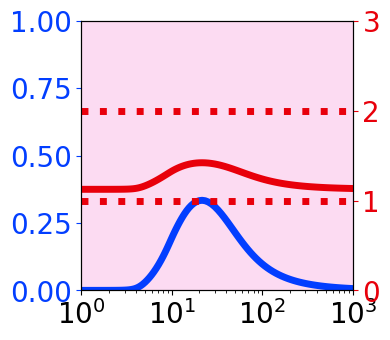

In [21]:
timeseries_pBC(1,1000,0,1,0,3)
PyPlot.savefig("Fig2D.pdf",bbox_inches="tight")

Function for producing the plot of the time series of the vital rates: mated pair survival ($s_M$) and late fertility ($f_2$).

In [22]:
function timeseries_vitalrates(tmin,tmax,sMmin,sMmax,f2min,f2max)
    
    fig, ax1 = plt.subplots()

    fig.set_figheight(3.5)
    fig.set_figwidth(3.5)
    
    ax1.plot(t,
    sM,label="s_M",
    color=colorsM,
    lw=linewidth,
    alpha=alpha_lines)
    
    ax1.plot(t,
    sM_without_helpers,
    label="s_M with h=0",
    color=colorsM,
    lw=linewidth,
    linestyle="dashed",
    alpha=alpha_lines)
    
    #ax1.set_xscale("log")
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([sMmin,sMmax])
    
    ax1.fill_between(t, sMmin, sMmax, where = conflict_zone, facecolor=color_conflict,alpha=alpha_bg)
    ax1.fill_between(t, sMmin, sMmax, where = nohelping_zone, facecolor=color_nohelping,alpha=alpha_bg)
    ax1.fill_between(t, sMmin, sMmax, where = voluntary_zone, facecolor=color_voluntary,alpha=alpha_bg)

    ax1.tick_params(axis="y",
                color=colorsM,
                labelcolor=colorsM)

    ax2 = ax1.twinx() 
    
    ax2.plot(t,
    f2,
    label="f_2",
    color=colorf2,
    lw=linewidth,
    alpha=alpha_lines)

    ax2.set_ylim([f2min,f2max])

    ax2.tick_params(axis="y",
                color=colorf2,
                labelcolor=colorf2)

    ax1.tick_params(axis="x", labelsize=ticksfontsize)
    ax1.tick_params(axis="y", labelsize=ticksfontsize)

    ax2.tick_params(axis="x", labelsize=ticksfontsize)
    ax2.tick_params(axis="y", labelsize=ticksfontsize)

    ax2.set_xscale("log")

end

timeseries_vitalrates (generic function with 1 method)

Fig. 2E.

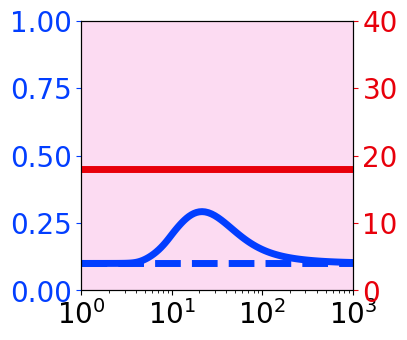

In [23]:
timeseries_vitalrates(1,1000,0,1,0,40)
PyPlot.savefig("Fig2E.pdf",bbox_inches="tight")

Run the model with $z$ evolving at infinite speed (i.e., $z=z^*(h)$) and plot the resulting $x(\tau)$ and $y(\tau)$ for a quick assessment of the process.

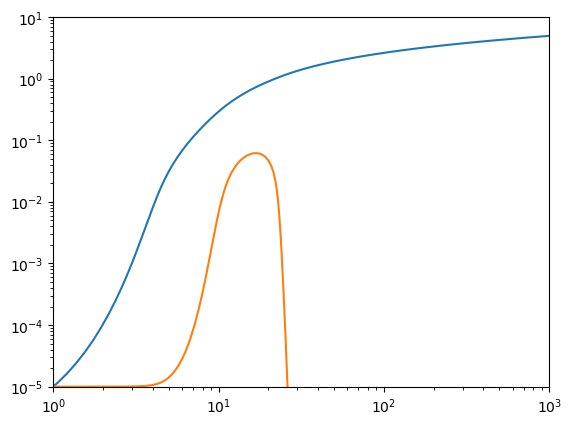

(1.0e-5, 10.0)

In [24]:
zvec0 = [0.00001;0.00001]
#tspan = (0.0, 1000.0)
tspan = (1.0, 1000.0)
prob = ODEProblem(mf.evoldyn_zfast,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(t,x,y,z,p,f2,h,sM,sM_without_helpers,Π2,BC,BCO,BCM) = ConflictDissolution.get_alloutputs(sol,mp,mf,"zfast")

PyPlot.plt.loglog(t,x)
PyPlot.plt.loglog(t,y)

PyPlot.plt.xlim(1, 1e3)
PyPlot.plt.ylim(1e-5, 1e1)

Get zone flags (used to add color to backgrounds of time series figures).

In [25]:
(nohelping_zone,conflict_zone,voluntary_zone) = ConflictDissolution.get_conflict_flags(p,z,mf)

(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Find the approximate time at which conflict dissolution happens.

In [26]:
minval, minindx = findmin(abs.(BC .- BCO))
tdiss = t[minindx]

17.10019141287053

Fig 2F.

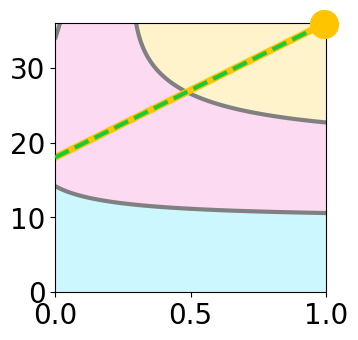

In [27]:
maincontourplot(true)

# add numerical solver path
PyPlot.plot(p,z,color=color_voluntary,lw=linewidth)
PyPlot.plot(last(p),last(z),color=color_voluntary,marker="o",markersize=20,clip_on=false,alpha=alpha_lines,zorder=10)

PyPlot.savefig("Fig2F.pdf",bbox_inches="tight")

Fig. 2G.

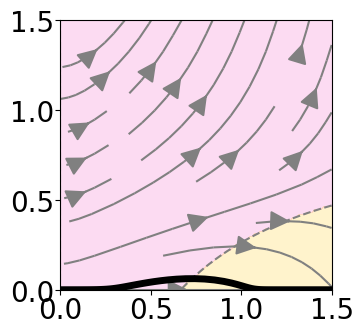

In [28]:
streamplot_dynamics("zfast",1.5,1.5,100)
PyPlot.savefig("Fig2G.pdf",bbox_inches="tight")

Fig. 2H.

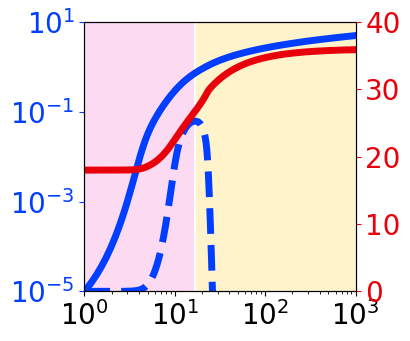

In [29]:
timeseries_traits(1,1000,0.00001,10,0.00001,40)
plt.savefig("Fig2H.pdf",bbox_inches="tight")

Fig. 2I.

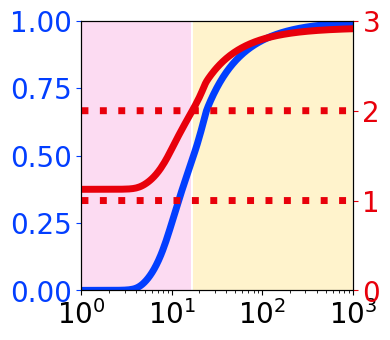

In [30]:
timeseries_pBC(1,1000,0,1,0,3)
PyPlot.savefig("Fig2I.pdf",bbox_inches="tight")

Fig. 2J.

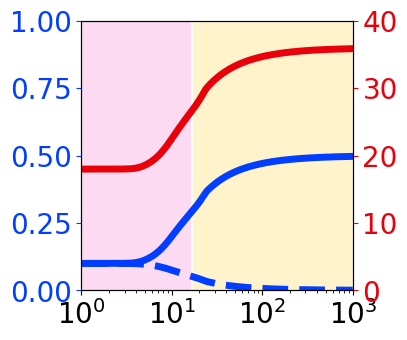

In [31]:
timeseries_vitalrates(1,1000,0,1,0,40)
PyPlot.savefig("Fig2J.pdf",bbox_inches="tight")

Function to plot promoters figures (e.g., Fig. S13 and S15).

In [32]:
function plot_promoters(pl,zl,ph,zh)
    
    maincontourplot(true)
    
    # add numerical solver path
    PyPlot.plot(pl,zl,color=color_conflict,lw=linewidth)
    PyPlot.plot(ph,zh,color=color_voluntary,lw=linewidth)
    
    # end point for the low parameter
    PyPlot.plot(last(pl),last(zl),color=color_conflict,marker="o",markersize=20,clip_on=false)
    
    # end point for the high parameter
    PyPlot.plot(last(ph),last(zh),color=color_voluntary,marker="o",markersize=20,clip_on=false,alpha=alpha_lines,zorder=10)
    
end  

plot_promoters (generic function with 1 method)

Fig. 4A (genetic variance for reproductive effort, $G_z$).

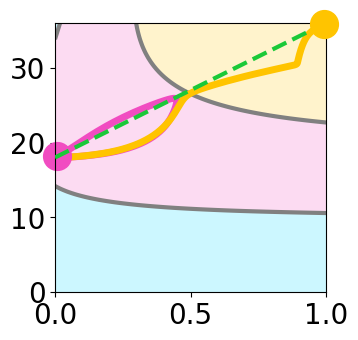

In [33]:
Gzl = 225.
Gzh = 250.

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gzl)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("Fig4A.pdf",bbox_inches="tight")

Fig. 4B (genetic variance for maternal influence, $G_x$).

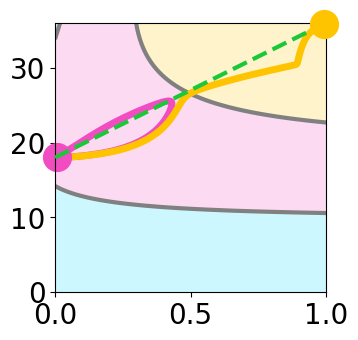

In [34]:
Gxl = .9
Gxh = 1.

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gxl,Gy,Gzh)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gxh,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("Fig4B.pdf",bbox_inches="tight")

Fig. 4C (maternal power, $\xi$).

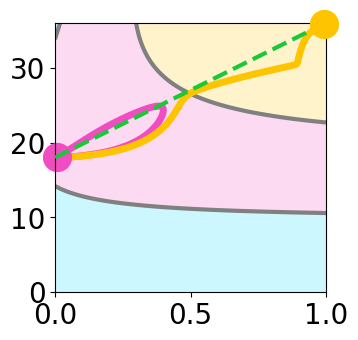

In [35]:
ξl = .9
ξh = 1.

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξl,ψ,contest_type,Gxh,Gy,Gzh)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξh,ψ,contest_type,Gxh,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("Fig4C.pdf",bbox_inches="tight")

Fig. 4D (contest type: sequential vs. simultaneous).

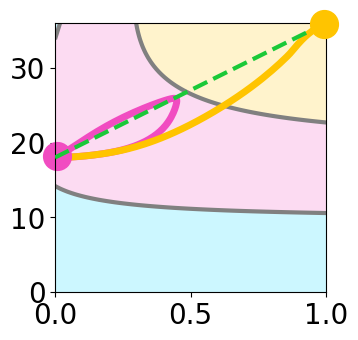

In [36]:
contest_typel = "sequential"
contest_typeh = "simultaneous"

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_typel,Gx,Gy,Gzl)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_typeh,Gx,Gy,Gzl)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("Fig4D.pdf",bbox_inches="tight")

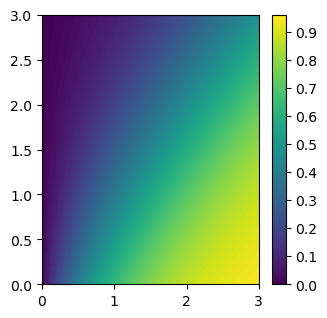

In [37]:
mf = mfh
jointphenotypecontour()
PyPlot.savefig("FigS11B.pdf",bbox_inches="tight")

Parameter values for Fig. S12 (similar to Fig. 2 but for haplodiploids when only females help).

In [38]:
ploidy = "HD" # ploidy/genetic system
gender_helpers = "F" # helpers' sex
σ1 = 1/2 # proportion of females 1st brood
σ2 = 1/2 # proportion of females 2nd brood
f1 = 8 # early fertility (number of offspring 1st brood)
s1 = .1 # 1st brood survival
s2 = .1 # 2nd brood survival
f0 = 1 # parameter for f2(z) function
α = 1 # parameter for f2(z) function
sMmin = .2 # maximum sM with 0 helpers
sMmax = 1 # maximum sM
f2min = 16 # minimum maximum late fertility (this is two times the initial f2)
f2max = 40 # maximum late fertility
ξ = 1 # mother's power parameter
ψ = 1 # offspring's power parameter
contest_type = "sequential" #"sequential" # type of contest
Gx = 1 # genetic variance x
Gy = 1 # genetic variance y
Gz = 1 # genetic variance z

mp = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gz)
mf = ConflictDissolution.setupfunctions(mp)

Model Functions

Run the model with constant $z$ and plot the resulting $x(\tau)$ and $y(\tau)$ for a quick assessment of the process.

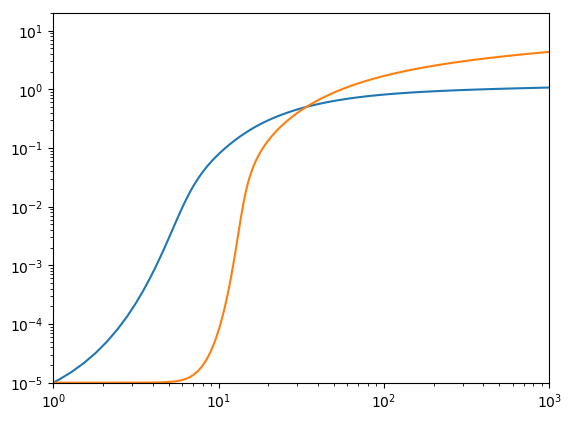

(1.0e-5, 20)

In [39]:
zvec0 = [0.00001;0.00001]
tspan = (1.0, 1000.0)
prob = ODEProblem(mf.evoldyn_z0,zvec0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(t,x,y,z,p,f2,h,sM,sM_without_helpers,Π2,BC,BCO,BCM) = ConflictDissolution.get_alloutputs(sol,mp,mf,"z0")

PyPlot.plt.loglog(t,x)
PyPlot.plt.loglog(t,y)

PyPlot.plt.xlim(1, 1e3)
PyPlot.plt.ylim(1e-5, 20)

Is there conflict at the starting point?

In [40]:
is_there_conflict_at_start = (mf.SpO(0.,z[1]) < 0) & (mf.SpM(0.,z[1]) > 0)

true

Get zone flags (used to add color to backgrounds of time series figures).

In [41]:
(nohelping_zone,conflict_zone,voluntary_zone) = ConflictDissolution.get_conflict_flags(p,z,mf)

(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Fig. S12A.

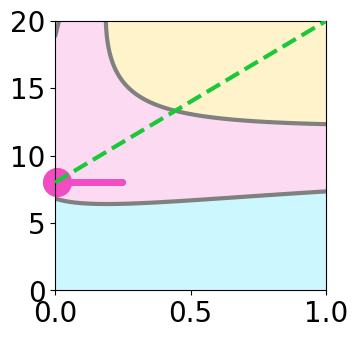

In [42]:
maincontourplot(true)

PyPlot.plot(last(p),last(z),color=color_conflict,marker="o",markersize=20,clip_on=false)

# add numerical solver path
PyPlot.plot(p,z,color=color_conflict,lw=linewidth)

PyPlot.savefig("FigS12A.pdf",bbox_inches="tight")

Fig. S12B.

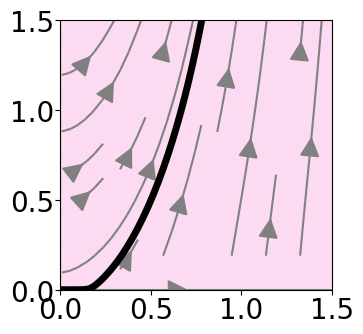

In [43]:
streamplot_dynamics("z0",1.5,1.5,100)
PyPlot.savefig("FigS12B.pdf",bbox_inches="tight")

Fig. S12C.

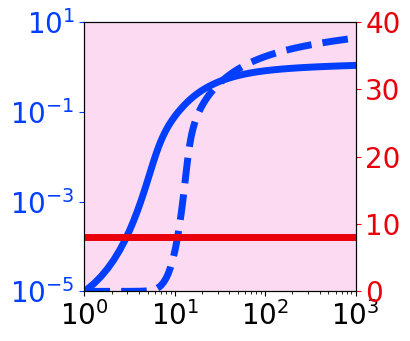

In [44]:
timeseries_traits(1,1000,0.00001,10,0.00001,40)
plt.savefig("FigS12C.pdf",bbox_inches="tight")

Fig. S12D.

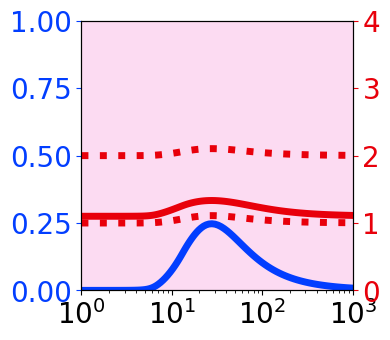

In [45]:
timeseries_pBC(1,1000,0,1,0,4)
PyPlot.savefig("FigS12D.pdf",bbox_inches="tight")

Fig. S12E.

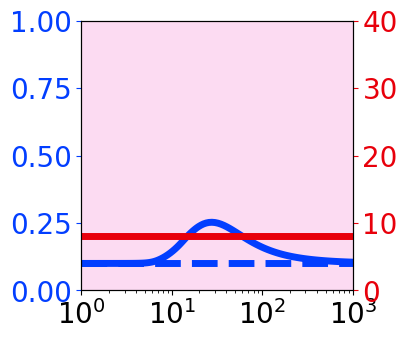

In [46]:
timeseries_vitalrates(1,1000,0,1,0,40)
PyPlot.savefig("FigS12E.pdf",bbox_inches="tight")

Run the model with $z$ evolving at infinite speed (i.e., $z=z^*(h)$) and plot the resulting $x(\tau)$ and $y(\tau)$ for a quick assessment of the process.

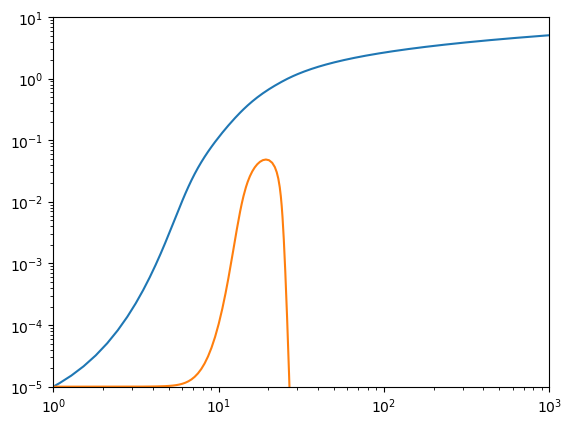

(1.0e-5, 10.0)

In [47]:
zvec0 = [0.00001;0.00001]
tspan = (1.0, 1000.0)
prob = ODEProblem(mf.evoldyn_zfast,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(t,x,y,z,p,f2,h,sM,sM_without_helpers,Π2,BC,BCO,BCM) = ConflictDissolution.get_alloutputs(sol,mp,mf,"zfast")

PyPlot.plt.loglog(t,x)
PyPlot.plt.loglog(t,y)

PyPlot.plt.xlim(1, 1e3)
PyPlot.plt.ylim(1e-5, 1e1)

Get zone flags (used to add color to backgrounds of time series figures).

In [48]:
(nohelping_zone,conflict_zone,voluntary_zone) = ConflictDissolution.get_conflict_flags(p,z,mf)

(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Find the approximate time at which conflict dissolution happens.

In [49]:
minval, minindx = findmin(abs.(BC .- BCO))
tdiss = t[minindx]

19.330115347436475

Fig. S12F.

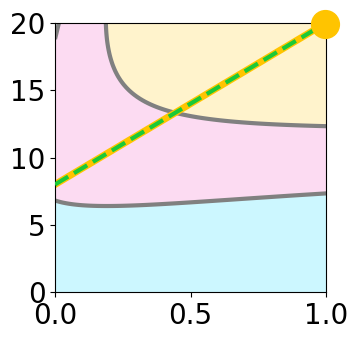

In [50]:
maincontourplot(true)

# add numerical solver path
PyPlot.plot(p,z,color=color_voluntary,lw=linewidth)
PyPlot.plot(last(p),last(z),color=color_voluntary,marker="o",markersize=20,clip_on=false,alpha=alpha_lines,zorder=10)

PyPlot.savefig("FigS12F.pdf",bbox_inches="tight")

Fig. S12G.

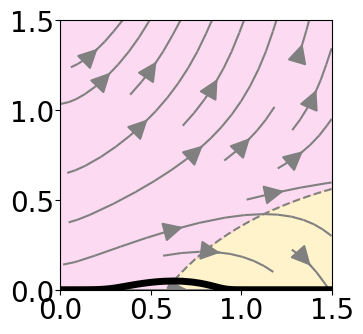

In [51]:
streamplot_dynamics("zfast",1.5,1.5,100)
PyPlot.savefig("FigS12G.pdf",bbox_inches="tight")

Fig. S12H.

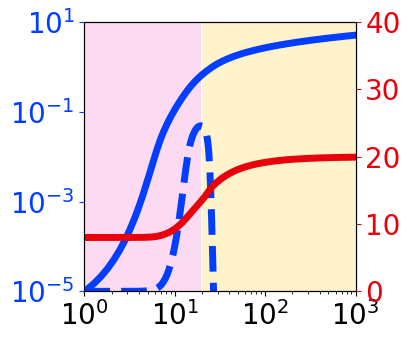

In [52]:
timeseries_traits(1,1000,0.00001,10,0.00001,40)
plt.savefig("FigS12H.pdf",bbox_inches="tight")

Fig. S12I.

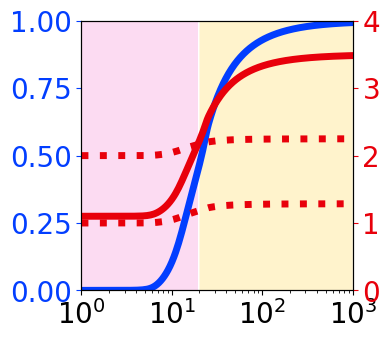

In [53]:
timeseries_pBC(1,1000,0,1,0,4)
PyPlot.savefig("FigS12I.pdf",bbox_inches="tight")

Fig. S12J.

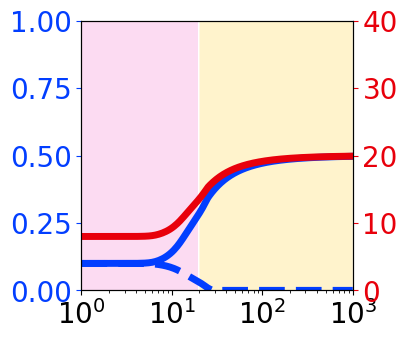

In [54]:
timeseries_vitalrates(1,1000,0,1,0,40)
PyPlot.savefig("FigS12J.pdf",bbox_inches="tight")

Fig. S13A.

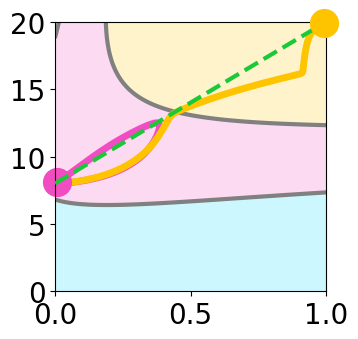

In [55]:
Gzl = 70.
Gzh = 80. 

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gzl)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("FigS13A.pdf",bbox_inches="tight")

Fig. S13B.

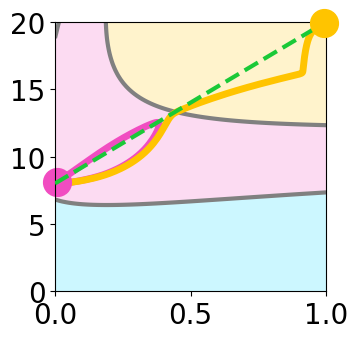

In [56]:
Gxl = .9
Gxh = 1.

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gxl,Gy,Gzh)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gxh,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("FigS13B.pdf",bbox_inches="tight")

Fig. S13C.

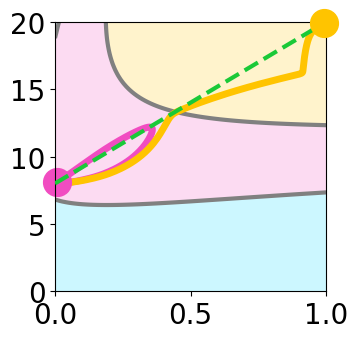

In [57]:
ξl = .9
ξh = 1.

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξl,ψ,contest_type,Gxh,Gy,Gzh)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξh,ψ,contest_type,Gxh,Gy,Gzh)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("FigS13C.pdf",bbox_inches="tight")

Fig. S13D.

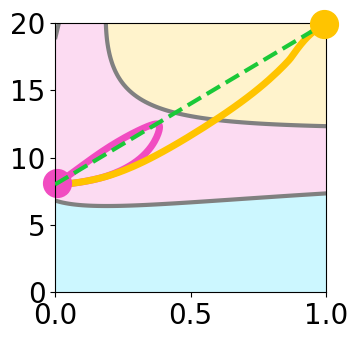

In [58]:
contest_typel = "sequential"
contest_typeh = "simultaneous"

mpl = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_typel,Gx,Gy,Gzl)
mfl = ConflictDissolution.setupfunctions(mpl)

zvec0 = [0.00001;0.00001;mfl.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfl.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(tl,xl,yl,zl,pl) = ConflictDissolution.get_mainoutputs(sol,mpl,mfl,"standard")

mph = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_typeh,Gx,Gy,Gzl)
mfh = ConflictDissolution.setupfunctions(mph)

zvec0 = [0.00001;0.00001;mfh.zstar(0)]
tspan = (1.0, 1000.0)
prob = ODEProblem(mfh.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(th,xh,yh,zh,ph) = ConflictDissolution.get_mainoutputs(sol,mph,mfh,"standard")

plot_promoters(pl,zl,ph,zh)

PyPlot.savefig("FigS13D.pdf",bbox_inches="tight")

Parameter values for Fig. S14.

In [59]:
ploidy = "HD" # ploidy/genetic system
gender_helpers = "F" # helpers' sex
σ1 = 1/2 # proportion of females 1st brood
σ2 = 1/2 # proportion of females 2nd brood
f1 = 6 # early fertility (number of offspring 1st brood)
s1 = .1 # 1st brood survival
s2 = .1 # 2nd brood survival
f0 = 1 # parameter for f2(z) function
α = 1 # parameter for f2(z) function
sMmin = .2 # maximum sM with 0 helpers
sMmax = 1 # maximum sM
f2min = 12 # minimum maximum late fertility (this is two times the initial f2)
f2max = 60 # maximum late fertility
ξ = 1 # mother's power parameter
ψ = 1 # offspring's power parameter
contest_type = "sequential" #"sequential" # type of contest
Gx = 1 # genetic variance x
Gy = 1 # genetic variance y
Gz = 1 # genetic variance z

mp = ConflictDissolution.ModelParameters(ploidy,gender_helpers,σ1,σ2,f1,s1,s2,f0,α,sMmin,sMmax,f2min,f2max,ξ,ψ,contest_type,Gx,Gy,Gz)
mf = ConflictDissolution.setupfunctions(mp)

Model Functions

In [60]:
zvec0 = [0.00001;0.00001;mf.zstar(0)]
tspan = (1.0, 10000.0)
prob = ODEProblem(mf.evoldyn,zvec0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

(t,x,y,z,p) = ConflictDissolution.get_mainoutputs(sol,mp,mf,"standard")
(t,x,y,z,p,f2,h,sM,sM_without_helpers,Π2,BC,BCO,BCM) = ConflictDissolution.get_alloutputs(sol,mp,mf,"standard")

([1.0, 1.0511061516128872, 1.0994971425116578, 1.1590319833552882, 1.2199600966671924, 1.2839730615925917, 1.3475692737452751, 1.410108074272684, 1.470341298735078, 1.527919989556108  …  9998.814592682556, 9998.9573767238, 9999.100160626984, 9999.242944401563, 9999.385728056994, 9999.528511583821, 9999.671294982045, 9999.81407826112, 9999.95686142105, 10000.0], [1.0e-5, 1.5590922381681097e-5, 2.373732988242284e-5, 3.9801137596653995e-5, 6.750803108294704e-5, 0.00011747821646609818, 0.00020331337589043227, 0.0003475696929727661, 0.0005796754463399952, 0.0009383323911521634  …  7.663560331308361, 7.6635781467010125, 7.663595961772234, 7.663613776523216, 7.663631590955149, 7.663649405066864, 7.663667218858372, 7.6636850323308625, 7.663702845484346, 7.663708227250565], [1.0e-5, 1.0000037279343996e-5, 1.0000091618117695e-5, 1.0000198837227344e-5, 1.000038398463719e-5, 1.0000718594336764e-5, 1.0001295442077366e-5, 1.000227084640343e-5, 1.0003855984769925e-5, 1.0006343898813654e-5  …  4.54863

In [61]:
is_there_conflict_at_start = (mf.SpO(0.,z[1]) < 0) & (mf.SpM(0.,z[1]) > 0)

true

Fig. S14A.

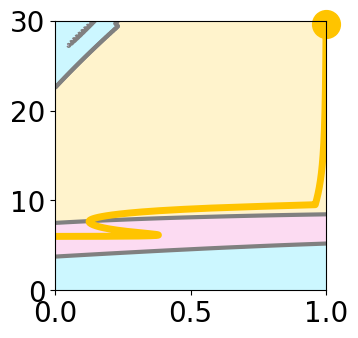

In [62]:
maincontourplot(false)
    
# add numerical solver path
PyPlot.plot(p,z,color=color_voluntary,lw=linewidth)
    
# end point
PyPlot.plot(last(p),last(z),color=color_voluntary,marker="o",markersize=20,clip_on=false)

PyPlot.savefig("FigS14A.pdf",bbox_inches="tight")

In [63]:
(nohelping_zone,conflict_zone,voluntary_zone) = ConflictDissolution.get_conflict_flags(p,z,mf)

(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Fig. S14B.

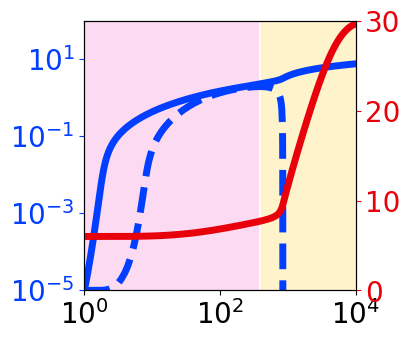

In [64]:
timeseries_traits(1,10000,0.00001,100,0.00001,30)
plt.savefig("FigS14B.pdf",bbox_inches="tight")

Fig. S14C.

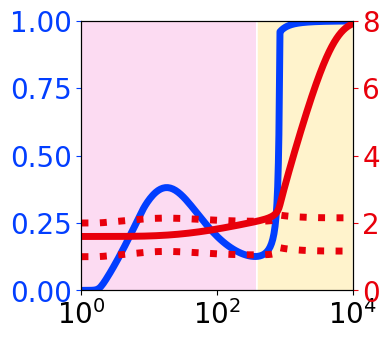

In [65]:
timeseries_pBC(1,10000,0,1,0,8)
PyPlot.savefig("FigS14C.pdf",bbox_inches="tight")

Fig. S14D.

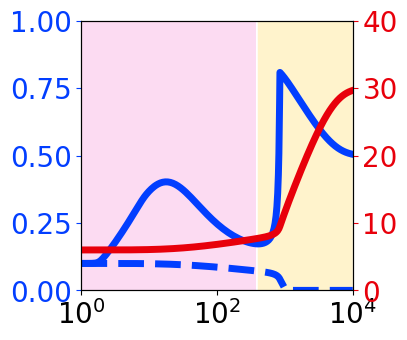

In [66]:
timeseries_vitalrates(1,10000,0,1,0,40)
PyPlot.savefig("FigS14D.pdf",bbox_inches="tight")